In [2]:
import ast
import pandas as pd
import os
from parseHelper import SeriesStringDictToDataframe, CountListLength

In [3]:
%%time
fl=pd.read_csv('./prepared_train_27Dec.csv', chunksize=10000)
df = pd.concat([i for i in fl], ignore_index=True)
print df.shape
# %%time
# fl=pd.read_csv('./clean_Json_updated_debug_Dec_17_2017.csv', chunksize=10000)
# df=fl.next()
# print df.shape

/home/shj16110/anaconda2/lib/python2.7/site-packages/IPython/core/magic.py:188: DtypeWarning: Columns (5,9,13,28,45,46,50,77,78,79,80,81) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


(195186, 93)
CPU times: user 5.47 s, sys: 516 ms, total: 5.99 s
Wall time: 6.04 s


In [8]:
df['user_id'] = df['userId'].astype(int)

### try predict with selected certain fields

In [6]:
label = pd.read_csv('./Training_set.csv')
print label.shape
label.head()

(108011, 3)


,index,label,user_id
0,0,1,5
1,2,1,64
2,3,1,128
3,4,1,215
4,5,1,220


In [13]:
df_t = df.set_index('user_id').join(label.set_index('user_id'), how='inner', lsuffix='data_')
df_t.shape

(102514, 94)

In [14]:
pd.options.display.max_rows=500

In [15]:
pd.concat([df.iloc[10:11,:].transpose(), pd.DataFrame(df.dtypes, columns=['Type'])], axis=1)

,10,Type
index,alesilva241.html,object
about.avatar,/ppic/102069964/logo/9777483/profile_logo_9777...,object
about.avatar_cdn,//cdn2.f-cdn.com/ppic/102069964/logo/9777483/p...,object
about.avatar_large,/ppic/102069962/logo/9777483/vizh6/profile_log...,object
about.avatar_large_cdn,//cdn5.f-cdn.com/ppic/102069962/logo/9777483/v...,object
about.chosen_role,1,object
about.company,NaN,object
about.display_name,Alexandra,object
about.hourly_rate,15,object
about.id,9.77748e+06,object


In [16]:
stat = lambda x: df_t[x].value_counts().head(5)

In [17]:
stat('about.chosen_role')

1.0    48277
3.0    34621
2.0    15345
1.0     2129
3.0     1452
Name: about.chosen_role, dtype: int64

In [18]:
df_t['about.hourly_rate'] = df_t['about.hourly_rate'].apply(lambda x: x.replace('None','0')).fillna(0).astype('int')

In [19]:
stat('about.hourly_rate')

0     40798
10    10863
15     6948
20     6589
5      5911
Name: about.hourly_rate, dtype: int64

In [20]:
stat('about.primary_language')

en    95890
es     1659
ru      878
fr      588
pt      562
Name: about.primary_language, dtype: int64

In [21]:
stat('about.recommendations')

0.0    87005
1.0     5490
0.0     3790
2.0     1975
3.0     1055
Name: about.recommendations, dtype: int64

In [22]:
stat('resume.certifications')

[]                                                                                                                                                                                                                                      81966
[{u'award_date': u'2012', u'descr': u'Web Application Development with Microsoft .Net framework 4', u'certificate': u'MCTS ', u'organisation': u'', u'organization': u'Microsoft', u'id': u'337184'}]                                       1
[{u'award_date': u'1993', u'descr': u'Computer Engineering', u'certificate': u'BE', u'organisation': u'', u'organization': u'sgsits', u'id': u'99989'}]                                                                                     1
[{u'award_date': u'2000', u'descr': u'The highest English Language diploma available in Spain.', u'certificate': u'English Master Diploma', u'organisation': u'', u'organization': u'Escuela Oficial de Idiomas', u'id': u'104313'}]        1
[{u'award_date': u'2012', u'descr': u'None', u'c

In [23]:
stat('city')

Dhaka        1758
London       1561
Lahore       1536
Bangalore    1379
New Delhi    1341
Name: city, dtype: int64

In [24]:
stat('about.role')

0.0    61793
1.0    40721
Name: about.role, dtype: int64

In [25]:
stat('country.name')

United States     25182
India             21028
United Kingdom     6517
Pakistan           5909
Canada             3402
Name: country.name, dtype: int64

In [26]:
stat('about.responsivenessText')

Replies within a few hours      52938
Replies within a day            17835
Replies within an hour          15831
Replies within a few minutes     7481
Replies within a few days        7420
Name: about.responsivenessText, dtype: int64

In [27]:
stat('summary.completion_rate')

100%    8383
50%     1810
67%     1046
75%      691
33%      631
Name: summary.completion_rate, dtype: int64

In [28]:
stat('summary.earnings_score')

0.0    77579
1.0      776
2.4      523
2.0      520
3.8      486
Name: summary.earnings_score, dtype: int64

In [29]:
stat('summary.earnings_score_pc')

0.000     77570
9.542       643
13.979      318
20.000      290
15.563      195
Name: summary.earnings_score_pc, dtype: int64

In [30]:
stat('summary.on_budget')

100%    22045
99%       789
98%       443
97%       275
96%       195
Name: summary.on_budget, dtype: int64

In [31]:
stat('summary.rating_score')

0.0    77798
5.0    15231
4.9     3862
4.8     2015
4.7      973
Name: summary.rating_score, dtype: int64

In [32]:
stat('summary.rehire_rate')

33%    985
25%    947
50%    944
20%    897
17%    790
Name: summary.rehire_rate, dtype: int64

In [33]:
stat('summary.reviews')

0.0    76391
1.0     5933
2.0     2848
3.0     1786
4.0     1224
Name: summary.reviews, dtype: int64

In [34]:
stat('deposit_made')

True     64984
False    37530
Name: deposit_made, dtype: int64

In [35]:
stat('facebook_connected')

False    80900
True     21614
Name: facebook_connected, dtype: int64

In [36]:
stat('payment_verified')

False    73148
True     29366
Name: payment_verified, dtype: int64

In [37]:
stat('phone_verified')

False    57921
True     44593
Name: phone_verified, dtype: int64

In [38]:
stat('profile_complete')

True     101690
False       824
Name: profile_complete, dtype: int64

In [39]:
stat('timezone')

Asia/Calcutta       11352
America/Chicago     10364
Europe/London        6739
America/New_York     5904
Asia/Kolkata         5716
Name: timezone, dtype: int64

### test 1

In [40]:
select_1 = [
    'about.chosen_role','about.hourly_rate','about.recommendations','about.role','about.responsivenessText',
    'resume.certifications','resume.education','resume.exams','resume.experience','resume.publications','resume.show','skills',
    'country.name', 'about.primary_language','timezone',
    'summary.completion_rate','summary.earnings_score','summary.earnings_score_pc','summary.on_budget','summary.rating_score',
    'summary.rehire_rate','summary.reviews','deposit_made','facebook_connected','payment_verified','phone_verified','profile_complete',
    'label'
]

In [42]:
test1 = df_t[select_1]
print test1.shape
print test1.isnull().sum().sum()

(102514, 28)
242646


In [43]:
test1 = test1.fillna("NoData")
test1.isnull().sum().sum()

0L

In [45]:
test1.head()

,about.chosen_role,about.hourly_rate,about.recommendations,about.role,about.responsivenessText,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,...,summary.on_budget,summary.rating_score,summary.rehire_rate,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
user_id,,,,,,,,,,,,,,,,,,,,,
1018449,2,60,0,1.0,NoData,"[{u'award_date': u'2011', u'descr': u'Hootsuit...",[],[],"[{u'year_interval': u'-2011', u'month_interval...",[],...,NoData,0.0,NoData,0.0,True,False,False,False,True,1
8288991,3,20,3,0.0,NoData,[],[],"[{u'examEnabled': u'1', u'description': u'US E...",[],[],...,100%,5.0,19%,43.0,True,False,False,True,True,0
314218,3,0,0,1.0,NoData,[],[],[],[],[],...,NoData,0.0,NoData,0.0,True,False,False,False,True,1
1240449,2,0,0,1.0,NoData,[],[],[],[],[],...,NoData,0.0,NoData,0.0,True,False,True,False,True,0
2157025,1,0,0,0.0,NoData,[],[],[],[],[],...,NoData,0.0,NoData,0.0,False,False,True,False,True,1


In [46]:
test1_v2 = test1.select_dtypes(exclude=['object'])
test1_v2.head()

,about.hourly_rate,about.role,summary.earnings_score,summary.earnings_score_pc,summary.rating_score,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
user_id,,,,,,,,,,,,
1018449,60,1.0,0.0,0.000,0.0,0.0,True,False,False,False,True,1
8288991,20,0.0,6.2,61.516,5.0,43.0,True,False,False,True,True,0
314218,0,1.0,0.0,0.000,0.0,0.0,True,False,False,False,True,1
1240449,0,1.0,0.0,0.000,0.0,0.0,True,False,True,False,True,0
2157025,0,0.0,0.0,0.000,0.0,0.0,False,False,True,False,True,1


In [49]:
from parseHelper import plot_confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import itertools

In [47]:
y=test1_v2.pop('label')

from sklearn.model_selection import train_test_split
dim=lambda *x: [i.shape for i in x]
X_train, X_test, y_train, y_test = train_test_split(test1_v2, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(71759, 11), (30755, 11), (71759,), (30755,)]

In [50]:
%%time
fr=RandomForestClassifier(n_jobs=24)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 474 ms, sys: 45 ms, total: 519 ms
Wall time: 300 ms


0.814696797269
Confusion matrix, without normalization
[[  184  5068]
 [  631 24872]]


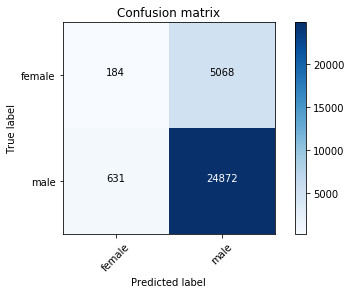

In [51]:
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['female','male'])

#### label encoding the entire set

In [52]:
def helper(x):
    try:
        return pd.factorize(x)[0]
    except:
        return x


#### notice many value changes, e.g. "label" value switched, so 0 rep male and 1 female

In [53]:
test1 = test1.apply(helper)
test1.head()

,about.chosen_role,about.hourly_rate,about.recommendations,about.role,about.responsivenessText,resume.certifications,resume.education,resume.exams,resume.experience,resume.publications,...,summary.on_budget,summary.rating_score,summary.rehire_rate,summary.reviews,deposit_made,facebook_connected,payment_verified,phone_verified,profile_complete,label
user_id,,,,,,,,,,,,,,,,,,,,,
1018449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8288991,1,1,1,1,0,1,0,1,1,0,...,1,1,1,1,0,0,0,1,0,1
314218,1,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1240449,0,2,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2157025,2,2,0,1,0,1,0,0,1,0,...,0,0,0,0,1,0,1,0,0,0


In [54]:
print test1.shape
y=test1.pop('label')

(102514, 28)


In [56]:
from sklearn.model_selection import train_test_split
dim=lambda *x: [i.shape for i in x]
X_train, X_test, y_train, y_test = train_test_split(test1, y, test_size=0.3,
                                                   random_state=7)
dim(X_train, X_test, y_train, y_test)

[(71759, 27), (30755, 27), (71759,), (30755,)]

In [57]:
%%time
fr=RandomForestClassifier(n_jobs=24)
fr.fit(X_train, y_train)
## predict labels
fr_p = fr.predict(X_test)
pd.Series(fr_p).value_counts()

CPU times: user 1.17 s, sys: 28 ms, total: 1.2 s
Wall time: 390 ms


0.813623801008
Confusion matrix, without normalization
[[24737   766]
 [ 4966   286]]


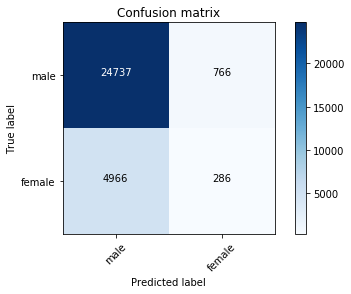

In [58]:
print accuracy_score(y_test, fr_p)
plot_confusion_matrix(confusion_matrix(y_test,fr_p), ['male','female'])

In [59]:
df.shape

(195186, 93)